0 th loss: 3.4090310180834122
10000 th loss: 0.38222672146405057
20000 th loss: 0.08168367413152142
30000 th loss: 0.04443050147057988
40000 th loss: 0.03034456979951793
50000 th loss: 0.02298883507877373
60000 th loss: 0.018482254736344666
70000 th loss: 0.015442461146134442
80000 th loss: 0.01325551022527466
90000 th loss: 0.011607610035877118
After training:

W1:
 [[5.63075522 5.62681631]
 [7.75457174 7.73075898]]
b1:
 [[-8.60627121]
 [-3.5587571 ]]
W2:
 [[-13.87969567  13.74073614]]
b2:
 [[-6.79673698]]
losses:
 [[3.40903102]
 [3.4087533 ]
 [3.40848153]
 ...
 [0.0103222 ]
 [0.01032208]
 [0.01032197]]


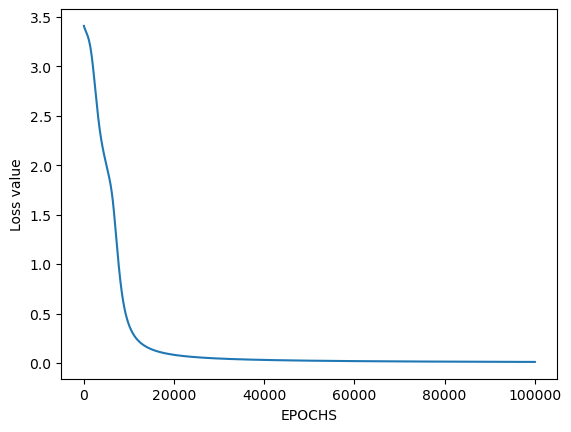

predicted labels: [[0. 1. 1. 0. 0.]]


In [1]:
import numpy as np
from matplotlib import pyplot as plt

def sigmoid(z):
    return 1/(1+np.exp(-z))

def forward_propagation(X,Y,W1,b1,W2,b2):
    net_h = np.dot(W1,X)+b1
    out_h = sigmoid(net_h)
    net_y = np.dot(W2,out_h)+b2
    out_y = sigmoid(net_y)
    
    return out_h,out_y

def calculate_error(y,y_predicted):
    loss = np.sum(-y*np.log(y_predicted)-(1-y)*np.log(1-y_predicted))
    return loss

def backward_propagation(X,Y,out_h,out_y,W2):
    l2_error = out_y-Y
    dW2 = np.dot(l2_error,out_h.T)
    db2 = np.sum(l2_error,axis=1,keepdims=True)
    
    dh = np.dot(W2.T,l2_error)
    l1_error = np.multiply(dh,out_h*(1-out_h))
    dW1 = np.dot(l1_error,X.T)
    db1 = np.sum(l1_error,axis=1,keepdims=True)
    
    return dW1,db1,dW2,db2

def update_parameters(W1,b1,W2,b2,dW1,db1,dW2,db2,learning_rate):
    W1 = W1-learning_rate*dW1
    W2 = W2-learning_rate*dW2
    b1 = b1-learning_rate*db1
    b2 = b2-learning_rate*db2
    
    return W1,b1,W2,b2

def train(X,Y,W1,b1,W2,b2,num_iterations,losses,learning_rate):
    for i in range(num_iterations):
        A1,A2 = forward_propagation(X,Y,W1,b1,W2,b2)
        losses[i,0] = calculate_error(Y,A2)
        if i%10000 == 0:
            print(i,'th loss:',losses[i,0])
        dW1,db1,dW2,db2 = backward_propagation(X,Y,A1,A2,W2)
        W1,b1,W2,b2 = update_parameters(W1,b1,W2,b2,dW1,db1,dW2,db2,learning_rate)
    return W1,b1,W2,b2,losses

np.random.seed(42)

X = np.array([[0,0,1,1],[0,1,0,1]])
Y = np.array([[0,1,1,0]])
n_h = 2
n_x = X.shape[0]
n_y = Y.shape[0]
W1 = np.random.randn(n_h,n_x)
b1 = np.zeros((n_h,1))
W2 = np.random.randn(n_y,n_h)
b2 = np.zeros((n_y,1))

num_iterations = 100000
learning_rate = 0.01
losses = np.zeros((num_iterations,1))

W1,b1,W2,b2,losses = train(X,Y,W1,b1,W2,b2,num_iterations,losses,learning_rate)

print("After training:\n")
print("W1:\n", W1)
print("b1:\n", b1)
print("W2:\n", W2)
print("b2:\n", b2)
print("losses:\n", losses)

plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

A1,A2 = forward_propagation(X,Y,W1,b1,W2,b2)
pred = (A2>0.5)*1.0
print("predicted labels:",pred)